# Importing required libraries

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle

# reading Dataset

In [182]:
df=pd.read_csv("CAR DETAILS.csv")
df.head(5)

,Brand,Car Name,Car Model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800,AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Starting With EDA

In [183]:
df['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

# Data Cleaning

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Car Name       4340 non-null   object
 2   Car Model      4340 non-null   object
 3   year           4340 non-null   int64 
 4   selling_price  4340 non-null   int64 
 5   km_driven      4340 non-null   int64 
 6   fuel           4340 non-null   object
 7   seller_type    4340 non-null   object
 8   transmission   4340 non-null   object
 9   owner          4340 non-null   object
dtypes: int64(3), object(7)
memory usage: 339.2+ KB


In [185]:
df.columns

Index(['Brand', 'Car Name', 'Car Model', 'year', 'selling_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner'],
      dtype='object')

# Checking null values

In [186]:
df.isnull().sum()  # we found that we don't have any null value in dataset

Brand            0
Car Name         0
Car Model        0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# checking weather duplicates are available or not and droping them

In [187]:
print('Duplicate values in dataset:',df.duplicated().sum())
df.drop_duplicates(keep=False,inplace=True)
print('duplicate values after cleaning:',df.duplicated().sum())  # checking again weather duplicates are still available or not.

Duplicate values in dataset: 763
duplicate values after cleaning: 0


In [188]:
df.dtypes # showing different columns catagorical dtta type which is difficult to handle so we will try to encode it.

Brand            object
Car Name         object
Car Model        object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

## Understanding the data by looking upto the columns and with help of vizualisation

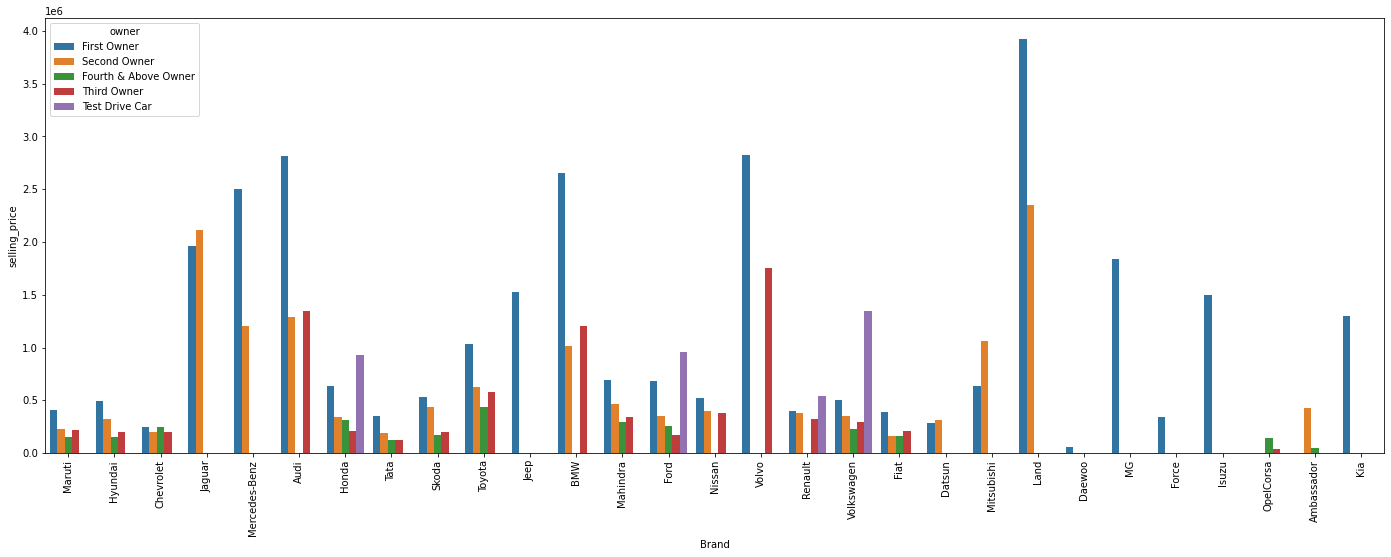

In [189]:
plt.figure(figsize=(24,8))
sb.barplot(x=df['Brand'],y=df['selling_price'],ci=None, hue=df['owner'])
plt.xticks(rotation=90)
plt.show()

#### Here from this chart we can say that price of cars of some particular brands are high and the cars which belongs to its first owner is higher

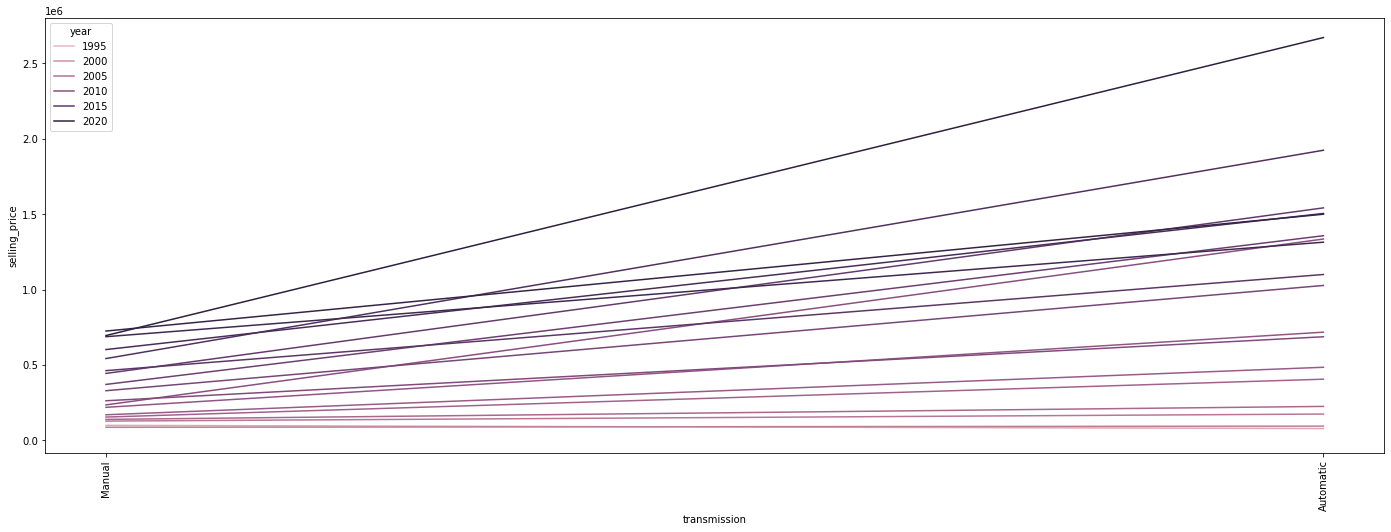

In [190]:
plt.figure(figsize=(24,8))
sb.lineplot(x=df['transmission'],y=df['selling_price'],ci=None, hue=df['year'])
plt.xticks(rotation=90)
plt.show()

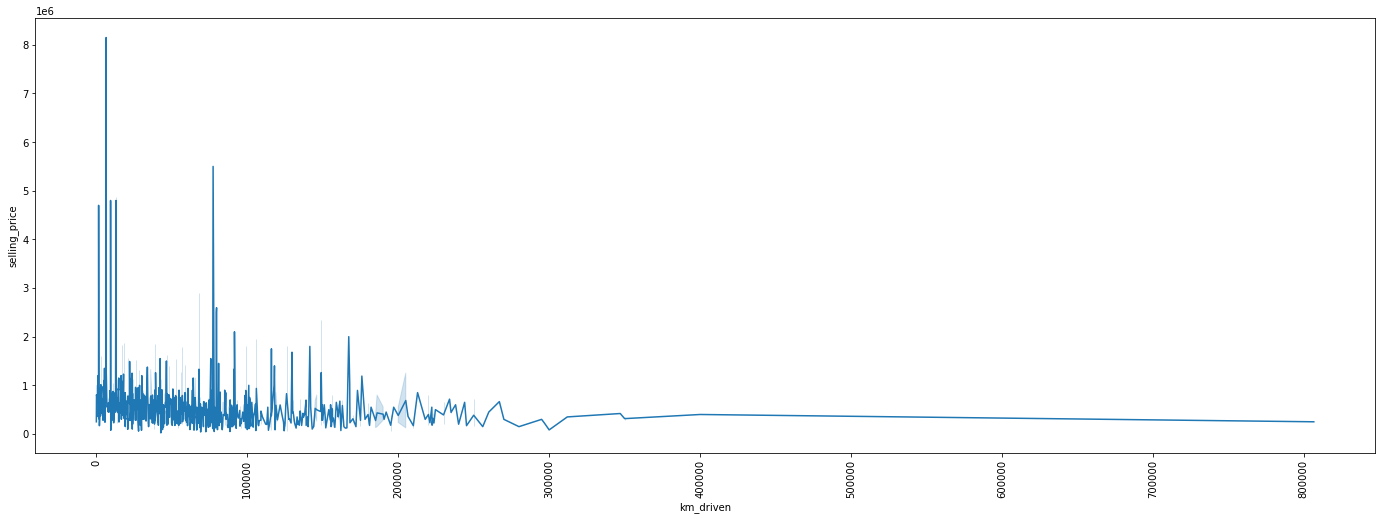

In [191]:
plt.figure(figsize=(24,8))
sb.lineplot(x=df['km_driven'],y=df['selling_price'])
plt.xticks(rotation=90)
plt.show()

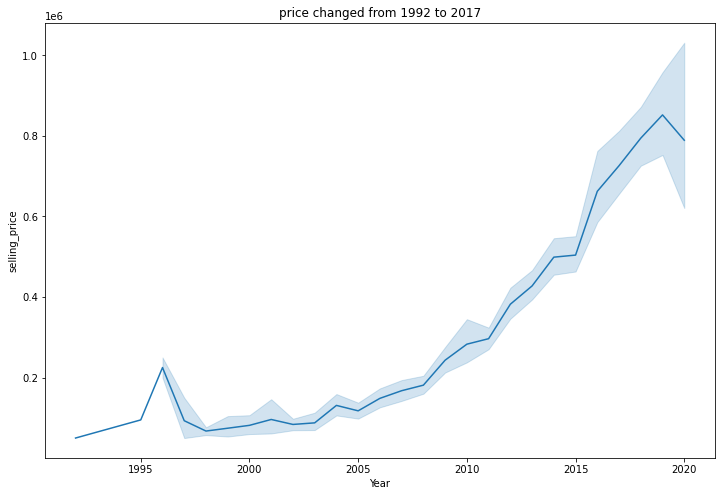

In [192]:
plt.figure(figsize=(12,8))
sb.lineplot(data=df,x="year",y="selling_price")
plt.title("price changed from 1992 to 2017")
plt.xlabel("Year")
plt.ylabel("selling_price")
plt.show()

#### Here from this chart we can see that line is rising with the year which means, newer cars are higher in price

In [194]:
df['Car Name'].unique()

array(['Ciaz', 'Venue', 'Enjoy', 'XF', 'New', 'Vitara', 'Q5', 'City',
       'Tigor', 'A6', 'Superb', 'Corolla', 'Innova', 'Compass', 'E-Class',
       'i10', '3', 'Q7', 'Elantra', 'Scorpio', 'Wagon', 'Santro', 'Swift',
       'Eeco', 'i20', 'Omni', 'Alto', 'Jeep', 'Indica', 'EON', 'Etios',
       'Tavera', 'Indigo', 'EcoSport', 'Civic', 'Rapid', 'Getz',
       'Terrano', 'Grand', 'Elite', 'Brio', 'S-Class', 'V40', 'SX4', '7',
       'Bolero', 'Sonata', 'Micra', 'Xylo', 'KWID', 'Creta', 'Verna',
       'Ertiga', 'Beat', 'Zen', 'Baleno', 'Nano', 'Quanto', 'Spark',
       'Amaze', 'XJ', 'Duster', '800', 'Nexon', 'Vento', 'Figo', 'Esteem',
       'Linea', 'Scala', 'XUV500', 'XUV300', 'S-Cross', 'Ameo', 'Optra',
       'Zest', 'Fabia', 'Sumo', 'Tiago', 'A-Star', 'GO', 'Yeti', 'Aspire',
       'X1', 'Outlander', 'Endeavour', 'Xcent', 'Ritz', 'Estilo', 'Cruze',
       'Fiesta', 'Manza', 'Safari', 'Fortuner', 'Ecosport', 'Supro',
       'KUV', 'Sail', 'Jetta', 'Polo', 'Mobilio', 'Accord', 'TU

# make a copy of the real dataset

In [193]:
df1 = df.copy()

# Detecting outliers and handling them

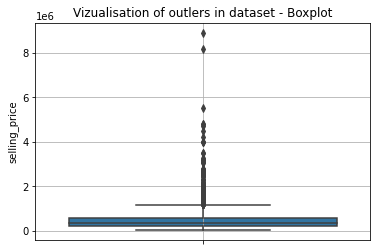

In [195]:
sb.boxplot(data=df,y='selling_price') # Plotting a Box plot
plt.title('Vizualisation of outlers in dataset - Boxplot') # Setting title for the plot
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

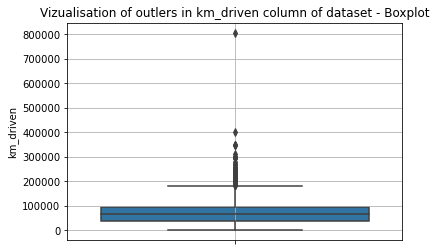

In [196]:
sb.boxplot(data=df,y='km_driven') # Plotting a Box plot
plt.title('Vizualisation of outlers in km_driven column of dataset - Boxplot') # Setting title for the plot
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

We can see here outliers are available in dataset which we need to remove before proceeding further

In [197]:
df1.head()

,Brand,Car Name,Car Model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
26,Maruti,Ciaz,VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner
27,Hyundai,Venue,SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner
28,Chevrolet,Enjoy,TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner
29,Jaguar,XF,2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner
30,Mercedes-Benz,New,C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner


# Removing Outliers

In [198]:
def remove_outliers(data, column):
    """function to calculate IQR and to remove outliers from the dataset"""
    # to get the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # get the upper and lower limit
    iqr = Q3 - Q1

    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr 

    # cap number below Q1 and above Q3 as outliers
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                   np.where(data[column] < lower_limit, lower_limit, data[column]))
    return  data


Cleaned_data = remove_outliers(df1, 'selling_price')

# new dataset
Cleaned_data.shape

(3051, 10)

In [200]:
def remove_outliers(data, column):
    """function to calculate IQR and to remove outliers from the dataset"""
    # to get the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # get the upper and lower limit
    iqr = Q3 - Q1

    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr 

    # cap number below Q1 and above Q3 as outliers
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                   np.where(data[column] < lower_limit, lower_limit, data[column]))
    return  data


Cleaned_data = remove_outliers(df1, 'km_driven')

# new dataset
Cleaned_data.shape

(3051, 10)

# visualise result before and after removing outliers

Before: 



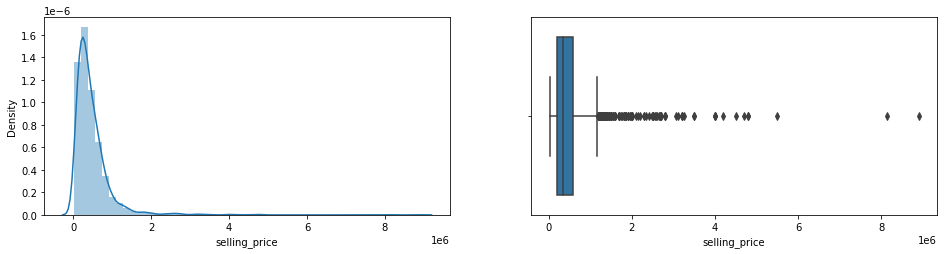

After: 



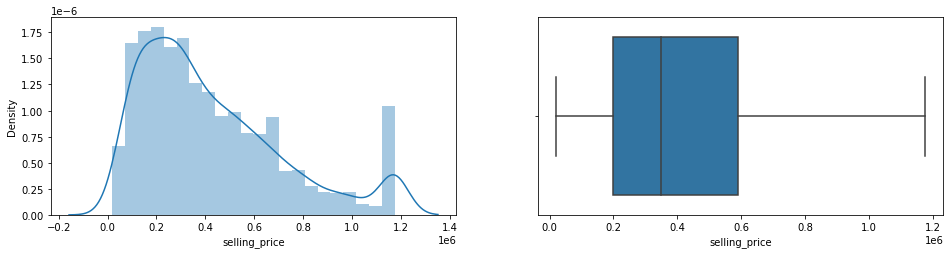

In [201]:
print('Before: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.distplot(df['selling_price'])  # histogragh

plt.subplot(2,2,2)
sb.boxplot(df['selling_price'])    #boxplot
plt.show()

print('After: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sb.distplot(Cleaned_data['selling_price'])

plt.subplot(2,2,4)
sb.boxplot(Cleaned_data['selling_price'])
plt.show()

Before: 



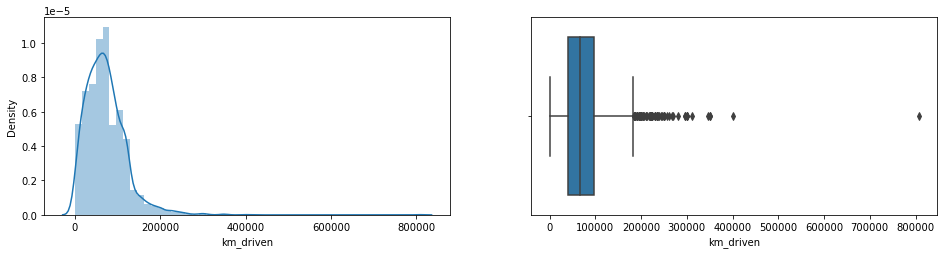

After: 



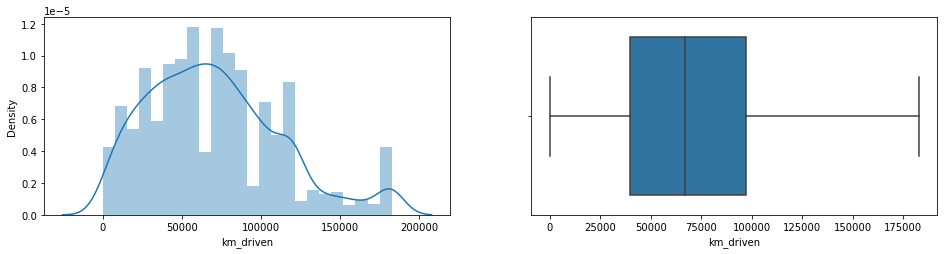

In [202]:
print('Before: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.distplot(df['km_driven'])  # histogragh

plt.subplot(2,2,2)
sb.boxplot(df['km_driven'])    #boxplot
plt.show()

print('After: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sb.distplot(Cleaned_data['km_driven'])

plt.subplot(2,2,4)
sb.boxplot(Cleaned_data['km_driven'])
plt.show()

In [203]:
def value_count(data, category_col):
    """function to print number of unique values in category column and visualise the top 5 count"""
    if data[category_col].dtype == 'object':
        number_of_makers = data[category_col].nunique()
        print(f'Number of unique car {category_col} availabe in the dataset is: {number_of_makers}')
            
    framed_data = data[category_col].value_counts().to_frame().reset_index()[:5]
    fig = px.bar(framed_data, 
                 x = framed_data.iloc[:,0],
                 y = framed_data.iloc[:,1],
                 title = category_col,
                 height = 600,
                 width = 800,
                 color_discrete_sequence = ['Pink'], 
                 labels = {'x': category_col, 
                           'y': (f'count of {category_col}')}
                ) 
    fig.show()

value_count(Cleaned_data, 'Car Model')

Number of unique car Car Model availabe in the dataset is: 1261


In [204]:
value_count(Cleaned_data, 'fuel')

Number of unique car fuel availabe in the dataset is: 5


In [205]:
value_count(Cleaned_data, 'transmission')

Number of unique car transmission availabe in the dataset is: 2


In [206]:
value_count(Cleaned_data, 'seller_type')

Number of unique car seller_type availabe in the dataset is: 3


# Data Pre-Processing
## Building a user defined label encoder function.

In [207]:
from sklearn.preprocessing import LabelEncoder 

# Create an instance of the Label Encoder
L_E = LabelEncoder()

def L_E(column):
    

    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])

    # Print the encoded DataFrame
    print(df.head())

In [208]:
L_E("Brand")
L_E("fuel")
L_E("seller_type")
L_E("transmission")
L_E("owner")
L_E("Car Name")

    Brand Car Name               Car Model  year  selling_price  km_driven  \
26     18     Ciaz          VXi Plus        2015         585000      24000   
27     10    Venue      SX Opt Diesel       2019        1195000       5000   
28      3    Enjoy   TCDi LTZ 7 Seater      2013         390000      33000   
29     12       XF   2.2 Litre Luxury       2014        1964999      28000   
30     19      New  C-Class 220 CDI AT      2013        1425000      59000   

      fuel seller_type transmission         owner  
26  Petrol      Dealer       Manual   First Owner  
27  Diesel      Dealer       Manual   First Owner  
28  Diesel  Individual       Manual  Second Owner  
29  Diesel      Dealer    Automatic   First Owner  
30  Diesel      Dealer    Automatic   First Owner  
    Brand Car Name               Car Model  year  selling_price  km_driven  \
26     18     Ciaz          VXi Plus        2015         585000      24000   
27     10    Venue      SX Opt Diesel       2019        1195000

In [229]:
from sklearn.preprocessing import LabelEncoder 

# Create an instance of the Label Encoder
L_E = LabelEncoder()

def L_E(column):
    

    # Fit and transform the column
    Cleaned_data[column] = label_encoder.fit_transform(Cleaned_data[column])

    # Print the encoded DataFrame
    print(Cleaned_data.head())

In [230]:
L_E("Brand")
L_E("fuel")
L_E("seller_type")
L_E("transmission")
L_E("owner")
L_E("Car Name")

    Brand Car Name               Car Model  year  selling_price  km_driven  \
26     18     Ciaz          VXi Plus        2015       585000.0    24000.0   
27     10    Venue      SX Opt Diesel       2019      1175000.0     5000.0   
28      3    Enjoy   TCDi LTZ 7 Seater      2013       390000.0    33000.0   
29     12       XF   2.2 Litre Luxury       2014      1175000.0    28000.0   
30     19      New  C-Class 220 CDI AT      2013      1175000.0    59000.0   

      fuel seller_type transmission         owner  
26  Petrol      Dealer       Manual   First Owner  
27  Diesel      Dealer       Manual   First Owner  
28  Diesel  Individual       Manual  Second Owner  
29  Diesel      Dealer    Automatic   First Owner  
30  Diesel      Dealer    Automatic   First Owner  
    Brand Car Name               Car Model  year  selling_price  km_driven  \
26     18     Ciaz          VXi Plus        2015       585000.0    24000.0   
27     10    Venue      SX Opt Diesel       2019      1175000.0

In [231]:
Cleaned_data.head()

,Brand,Car Name,Car Model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
26,18,36,VXi Plus,2015,585000.0,24000.0,4,0,1,0
27,10,155,SX Opt Diesel,2019,1175000.0,5000.0,1,0,1,0
28,3,55,TCDi LTZ 7 Seater,2013,390000.0,33000.0,1,1,1,2
29,12,166,2.2 Litre Luxury,2014,1175000.0,28000.0,1,0,0,0
30,19,100,C-Class 220 CDI AT,2013,1175000.0,59000.0,1,0,0,0


# Splitting the target variable which is Selling Price and droping Car Model from datafram for better response 

In [232]:
X= Cleaned_data.drop(['selling_price','Car Model'], axis=1)
y= Cleaned_data.selling_price

print(X.shape)
print(y.shape)

(3051, 8)
(3051,)


In [234]:
def check_correlation(dataset, threshold):
    corr_matrix = dataset.corr().abs()
    correlated_columns = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                correlated_columns.append((corr_matrix.columns[i], corr_matrix.columns[j]))
    return correlated_columns

correlated_columns = check_correlation(Cleaned_data, 0.75)
if len(correlated_columns) > 0:
    print("Correlation exists between columns:")
    for column_pair in correlated_columns:
        print(column_pair)
else:
    print("No correlation found between columns.")


No correlation found between columns.


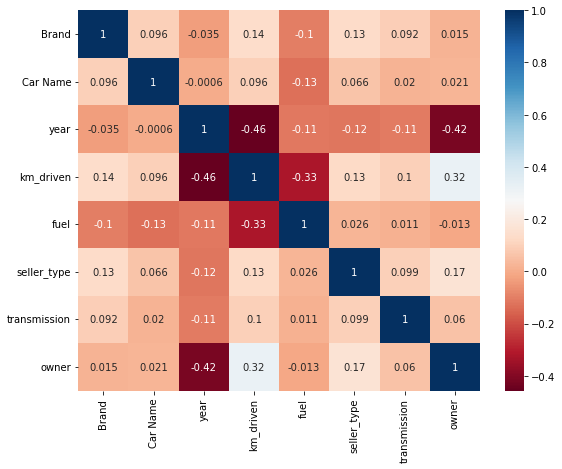

In [233]:
corr= X.corr()
plt.figure(figsize=(9,7))
sb.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

# Before fitting we will try to scale the variable for better performance or for:
### 1.)Normalization of Variables
### 2.)to remove Skewed Influence

In [238]:
St_sc = StandardScaler()   

In [239]:
X_St_sc = St_sc.fit_transform(X)
X_St_sc

array([[ 0.34070415, -1.04426988,  0.49414735, ..., -2.07664471,
         0.29679698, -0.74425664],
       [-0.86258148,  1.12270173,  1.43392828, ..., -2.07664471,
         0.29679698, -0.74425664],
       [-1.9154564 , -0.69828281,  0.02425688, ...,  0.43957571,
         0.29679698,  0.78330946],
       ...,
       [ 0.34070415, -1.59056524, -0.91552405, ...,  0.43957571,
         0.29679698,  0.78330946],
       [-0.86258148, -0.93501081,  0.72909258, ...,  0.43957571,
         0.29679698, -0.74425664],
       [ 1.09275767, -0.13377761,  0.72909258, ...,  0.43957571,
         0.29679698, -0.74425664]])

# Now We need to split the data in train and test to fit the variables in models

In [245]:
x_train,x_test,y_train,y_test=train_test_split(X_St_sc,y,test_size=.20,random_state=4)

In [255]:
def eval_metrics(model):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import math
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rr= r2_score(y_test, y_pred)
    print('The R2_Score is :',rr)
 

    # Evaluating the model on the training data
    train_score = model.score(x_train, y_train)

    # Evaluating the model on the test data
    test_score = model.score(x_test, y_test)

    # Print the training and test scores
    print('Training Score is:',train_score)
    print('Test Score is:',test_score)
    

# Fitting in Linear Regression Model

In [256]:
lr = LinearRegression()
eval_metrics(lr)

The R2_Score is : 0.5420303618654929
Training Score is: 0.5617977860495658
Test Score is: 0.5420303618654929


# Fitting Random Forest Model

In [263]:
R_f= RandomForestRegressor(n_estimators=300,criterion='poisson', max_depth= 10, max_samples=0.8)
eval_metrics(R_f)   # here we are going to predict on numerical value so we need to take Criterion "poisson" 

The R2_Score is : 0.3349778354182209
Training Score is: 0.4005069168315013
Test Score is: 0.3349778354182209


# Extra tree Classifier Model

In [264]:
Ex_tr=ExtraTreesRegressor(n_estimators=5000, max_depth=5, criterion="absolute_error")
eval_metrics(Ex_tr)

The R2_Score is : 0.6157562515717274
Training Score is: 0.6382762188337623
Test Score is: 0.6157562515717274


# Ada Boost Classifier

In [265]:
Ad_b = AdaBoostRegressor(n_estimators=10000, learning_rate=1.15)
eval_metrics(Ad_b)

The R2_Score is : 0.5217829686063575
Training Score is: 0.5566446623803528
Test Score is: 0.5217829686063575


# Gradient boosting

In [266]:
G_b = GradientBoostingRegressor(n_estimators=800, learning_rate=0.2, random_state=45,max_features='auto')
eval_metrics(G_b)

The R2_Score is : 0.8417641989490763
Training Score is: 0.9593771811789987
Test Score is: 0.8417641989490763


# Bagging Classifier

In [267]:
B_R = BaggingRegressor(n_estimators=500, verbose= 1)
eval_metrics(B_R)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The R2_Score is : 0.8194225586820555
Training Score is: 0.9712745731965475
Test Score is: 0.8194225586820555


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


# Saving the pickle file

In [268]:
model = R_f
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [269]:
# Assuming your pickle file is named 'model.pkl'
with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [271]:
data = Cleaned_data.sample(20)
data

,Brand,Car Name,Car Model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2709,10,157,1.6 SX VTVT,2014,550000.0,100000.00,4,1,1,0
2468,18,160,R VXI BS IV,2014,210000.0,70000.00,4,1,1,2
2400,8,62,Diesel Celebration Edition,2013,285000.0,90000.00,1,1,1,2
3075,18,158,Brezza ZDi Plus AMT,2018,800000.0,30000.00,1,1,0,2
3675,17,172,E9,2012,300000.0,182483.75,1,1,1,0
1921,18,143,Dzire ZXI,2013,360000.0,60000.00,4,1,1,2
3296,3,33,2.0L VCDi,2011,400000.0,76000.00,1,1,1,4
3656,18,158,Brezza ZDi Plus,2016,975000.0,65000.00,1,1,1,0
1330,24,141,Elegance 2 TDI CR AT,2015,1000000.0,80000.00,1,1,0,2
1894,25,78,GLS BS IV,2008,65000.0,110000.00,4,1,1,4


In [272]:
Model = data
with open('data.pkl', 'wb') as f:
    pickle.dump(Model, f)